# Wavelet:

In [5]:
#Importing the libraries to watch the 'fits' image and get the data array
import astropy
#import plotly.graph_objects as go
from astropy.io import fits
from sklearn.metrics import mean_squared_error
#Importing a library that is useful to read the original file
import pandas as pd
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
#Importing a visual library with some illustrative set up
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
from matplotlib import cm
import numpy as np
import math 
from scipy.stats import chisquare

import pywt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (16, 8) 
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
plt.rcParams["axes.grid"] = False

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256))) 
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

In [6]:
data=pd.read_csv('day.csv',sep=';',header=None)
data=data.rename(columns={0:'Year',1:'Month',2:'Day',3:'Date',4:'Sunspot',5:'Std',6:'N',7:'isprov'})
data=data.drop(data[data['Sunspot']==-1].index)
data=data.drop(data[data.isprov==0].index)

In [7]:
data.head()

,Year,Month,Day,Date,Sunspot,Std,N,isprov
7,1818,1,8,1818.021,65,10.2,1,1
12,1818,1,13,1818.034,37,7.7,1,1
16,1818,1,17,1818.045,77,11.1,1,1
17,1818,1,18,1818.048,98,12.6,1,1
18,1818,1,19,1818.051,105,13.0,1,1


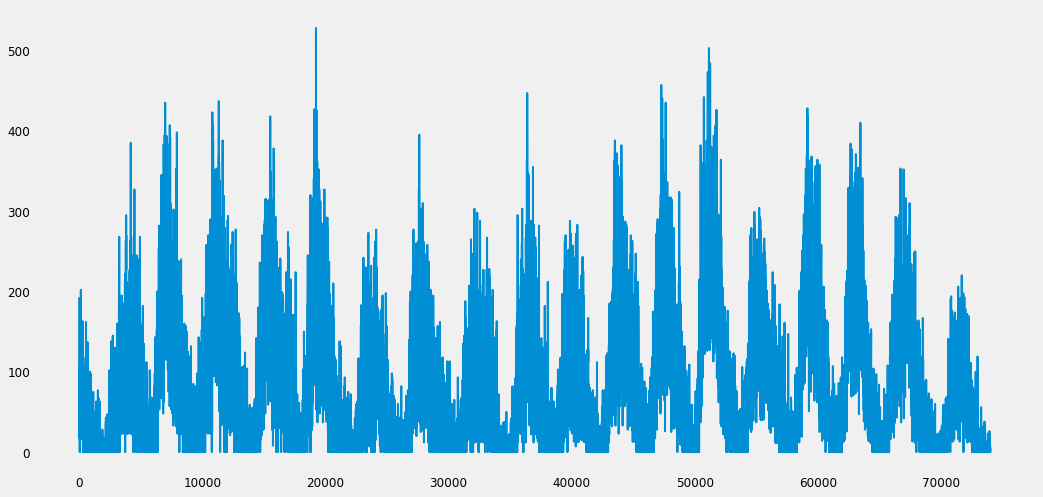

In [8]:

plt.plot(data.Sunspot)

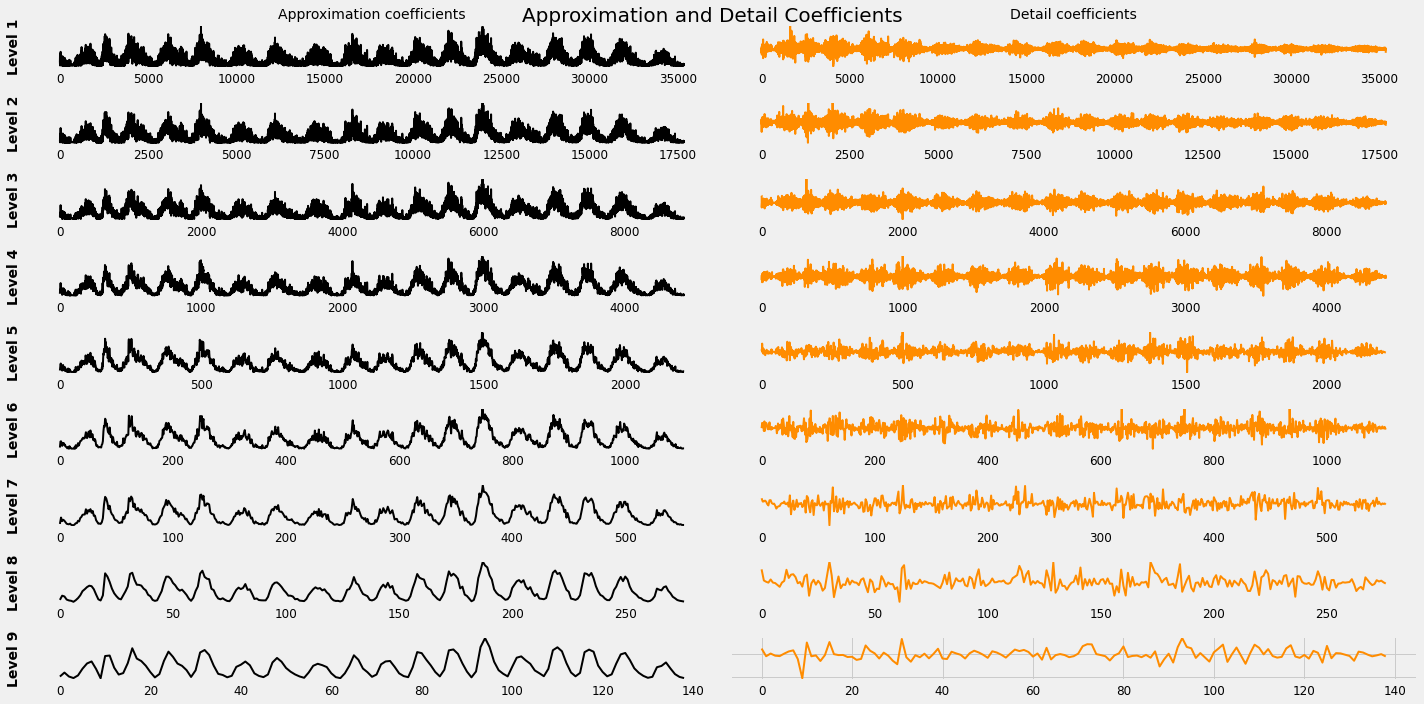

In [10]:
#indices=np.arange(96*10,96*17,1)
#power=2**18
week=data
time=week.Date.max()
sample_rate=1/900.
size= int(sample_rate*time)
t = np.linspace(0, time, num=size)
dataset = np.array(week.Sunspot.tolist())
waveletname = 'sym2'
levels=9
fig, axarr = plt.subplots(nrows=levels, ncols=2, figsize=(20,10))
COEFF_D=[]
DATASET=[]
k=1
for ii in range(levels):
    (dataset, coeff_d) = pywt.dwt(dataset, waveletname,mode='per')
    axarr[ii, 0].plot(dataset, 'k')
    axarr[ii, 1].plot(coeff_d, 'darkorange')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    plt.grid(True)
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
    plt.grid(True)
    #print(len(coeff_d))
    COEFF_D.append(np.repeat(coeff_d,2**k))
    DATASET.append(np.repeat(dataset,2**k))
    k=k+1
plt.tight_layout()
plt.suptitle('Approximation and Detail Coefficients',fontsize=20)
plt.show()

In [11]:
error=DATASET[0]-data.Sunspot

In [12]:
corr=np.corrcoef(error,data.Sunspot)[0][1]

In [13]:
print(' The correlation of the dataset with the error is: ' + str(corr*100)+ '%')

 The correlation of the dataset with the error is: 77.18065241651058%


In [14]:
from sklearn.metrics import mean_squared_error as mse

In [15]:
print ('The RMSE is the ' + str(np.sqrt(mse(error,data.Sunspot))/data.Sunspot.max()*100) + '% of the maximum value')

The RMSE is the 13.757128824106903% of the maximum value


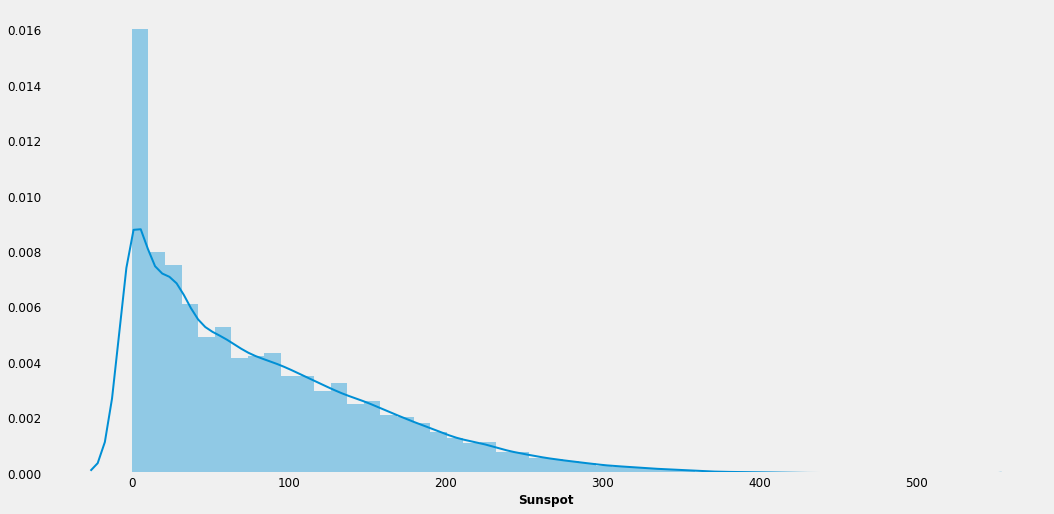

In [16]:
sns.distplot(data.Sunspot)

In [17]:
y=[7.97734322e-03, 7.51935239e-03, 6.11725765e-03,
       4.91737524e-03, 5.28966018e-03, 4.17548366e-03, 4.22637153e-03,
       4.34287797e-03, 3.49787149e-03, 3.52331543e-03, 2.96354886e-03,
       3.25682369e-03, 2.49082733e-03, 2.61536869e-03, 2.09042014e-03,
       2.01676664e-03, 1.81857178e-03, 1.47708739e-03, 1.26416183e-03,
       1.09275005e-03, 1.14497708e-03, 7.74031288e-04, 7.68674670e-04,
       5.37000945e-04, 5.06200392e-04, 4.49955904e-04, 3.56215091e-04,
       2.78544131e-04, 2.41047806e-04, 2.28995416e-04, 1.49985301e-04,
       1.56681074e-04, 1.05793204e-04, 6.16011059e-05, 5.62444880e-05,
       4.95487157e-05, 3.74963254e-05, 2.27656261e-05, 1.60698537e-05,
       1.74090082e-05, 9.37408134e-06, 6.69577239e-06, 4.01746343e-06,
       4.01746343e-06, 5.35661791e-06, 1.33915448e-06, 2.67830895e-06,
       0.000001e+00, 4.01746343e-06]

In [18]:
x=[  10.56,  21.12,  31.68,  42.24,  52.8 ,  63.36,  73.92,
        84.48,  95.04, 105.6 , 116.16, 126.72, 137.28, 147.84, 158.4 ,
       168.96, 179.52, 190.08, 200.64, 211.2 , 221.76, 232.32, 242.88,
       253.44, 264.  , 274.56, 285.12, 295.68, 306.24, 316.8 , 327.36,
       337.92, 348.48, 359.04, 369.6 , 380.16, 390.72, 401.28, 411.84,
       422.4 , 432.96, 443.52, 454.08, 464.64, 475.2 , 485.76, 496.32,
       506.88, 517.44  ]
y=np.array(y)
x=np.log(np.array(x))
x=x.reshape(-1,1)
y=np.log(y)
#y=y.reshape(-1,1)


In [19]:
y=y-y.min()

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(10)
X=poly.fit_transform(x)
reg = LinearRegression().fit(X,y )


In [21]:
reg = LinearRegression().fit(X,y )

reg.score(X,y)


#reg.coef_*X+reg.intercept_

0.9936576753737058

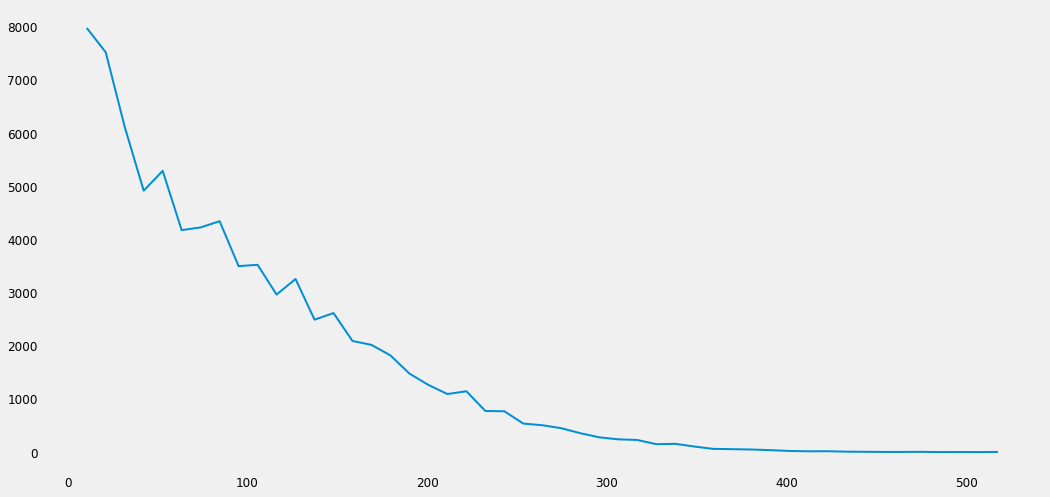

In [22]:
plt.plot(np.exp(x),np.exp(y))


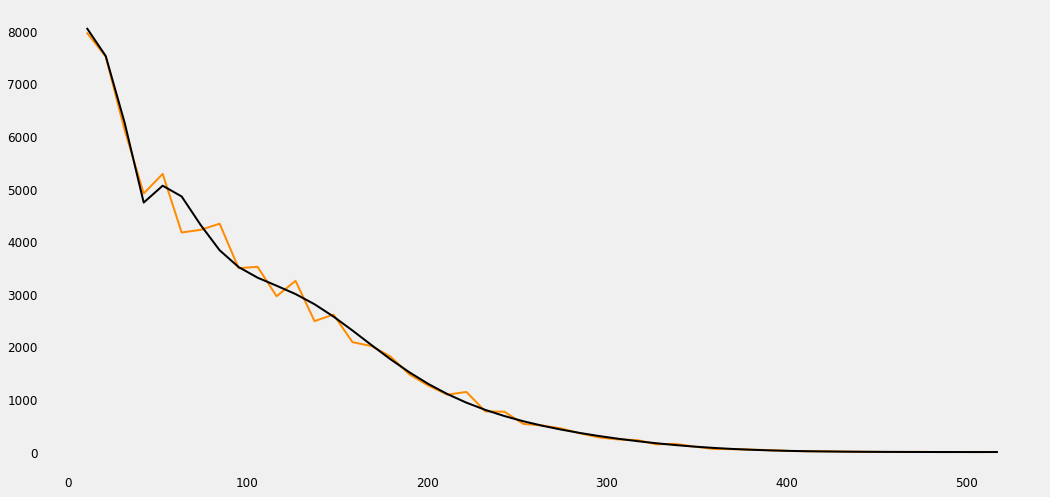

In [23]:
plt.plot(np.exp(x),np.exp(y),color='darkorange')
plt.plot(np.exp(x),np.exp(reg.predict(X)),color='black')
#plt.xlim(0,1.)

# Periodic data:

In [24]:
data=pd.read_csv('year.csv',sep=';',header=None)

Column 1: Gregorian calendar year (mid-year date)
Column 2: Yearly mean total sunspot number.
Column 3: Yearly mean standard deviation of the input sunspot numbers from individual stations.
Column 4: Number of observations used to compute the yearly mean total sunspot number.
Column 5: Definitive/provisional marker. '1' indicates that the value is definitive. '0' indicates that the value is still provisional.

In [25]:
data.tail()

,0,1,2,3,4
315,2015.5,69.8,6.4,8903,1
316,2016.5,39.8,3.9,9940,1
317,2017.5,21.7,2.5,11444,1
318,2018.5,7.0,1.1,12611,1
319,2019.5,3.6,0.5,12884,1


In [26]:
data=data.rename(columns={0:'Year',1:'Sunspot',2:'Sd',3:'N',4:'isprov'})

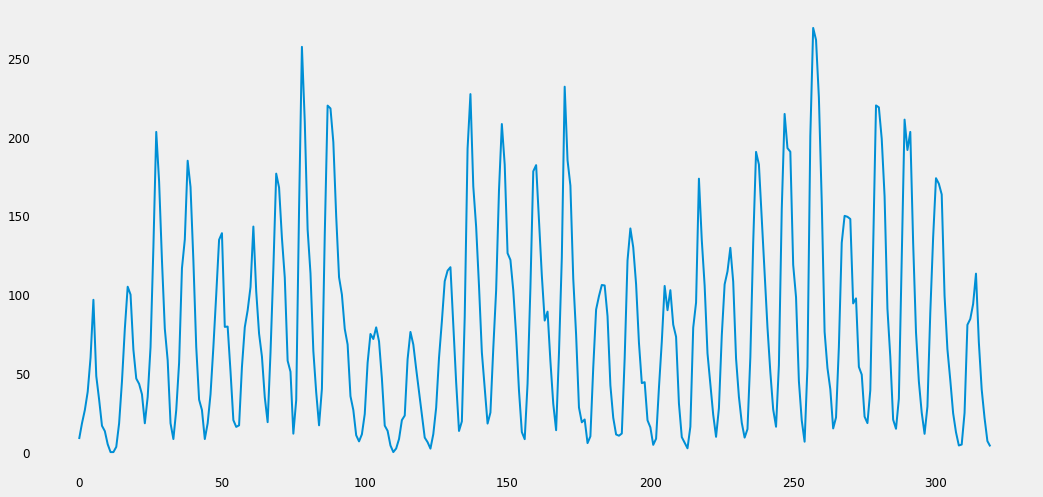

In [27]:
plt.plot(data.Sunspot)

In [28]:
under=np.array(data.Sunspot)
year=np.array(data.Year)
MIN=[]
VALUE=[]
YEAR=[]
for i in range(1,len(under)-1):
    value=under[i]
    if value<under[i-1] and value<=under[i+1]:
        MIN.append(i)
        VALUE.append(value)
        YEAR.append(year[i])

In [29]:
datapoint=pd.DataFrame({'V':VALUE,'M':MIN,'Year':YEAR})

In [30]:
datapoint=datapoint.drop(datapoint[datapoint['V']>40].index)

In [31]:
datapoint=datapoint.drop(datapoint[datapoint['M']==176].index)

In [32]:
year=np.array(datapoint.Year)
V=np.array(datapoint.V)

In [33]:
datapoint['yeardiff']=datapoint.Year.diff()

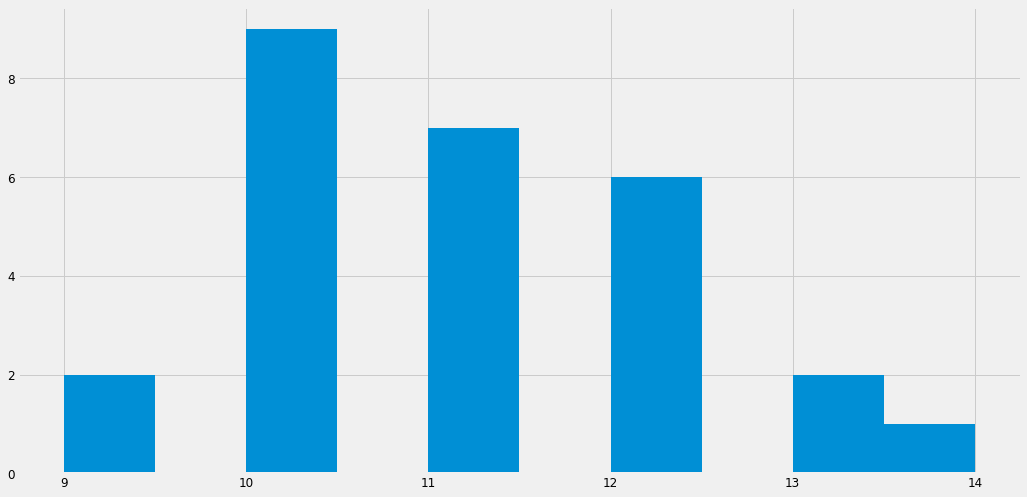

In [34]:
datapoint.yeardiff.hist()

In [35]:
MINV=np.array(datapoint.V)


In [36]:
MAX=[]
MIN=np.array(datapoint.M)

In [37]:
ARGMAX=[]
for m in range(len(MIN)-1):
    MAX.append(under[MIN[m]:MIN[m+1]].max())
    ARGMAX.append(under[MIN[m]:MIN[m+1]].argmax()+MIN[m])

In [38]:
MAX.append(under[MIN[m+1]::].max())
ARGMAX.append(under[MIN[m+1]::].argmax()+MIN[m+1])

In [39]:
MAX=np.array(MAX)
#ARGMAX=np.array(ARGMAX)

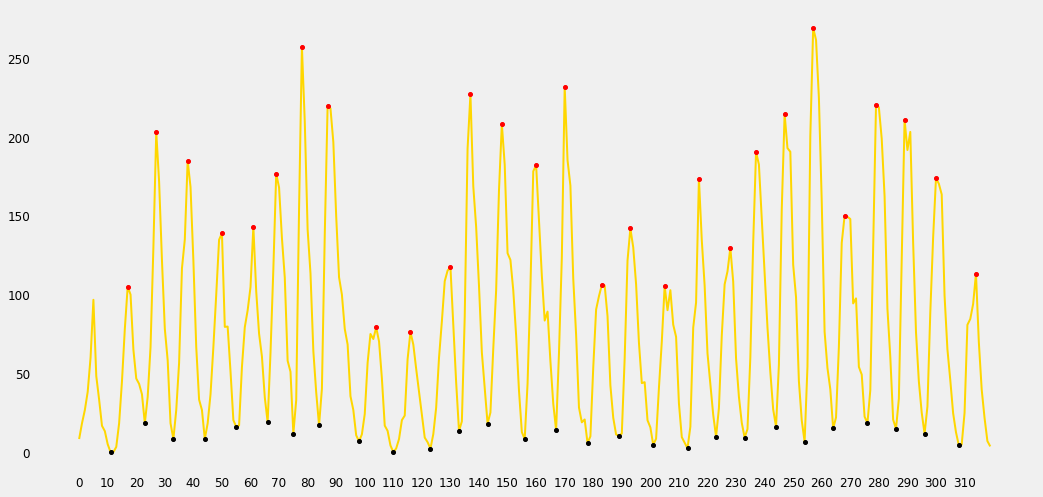

In [1560]:
plt.plot(under,color='gold')
plt.xticks(np.arange(0,len(under),10))
plt.plot(ARGMAX,MAX,'.',color='red')
plt.plot(MIN,MINV,'.',color='black')

In [1561]:
max_data=pd.DataFrame({'i':ARGMAX,'value':MAX})


# Cycle Exploration

In [377]:
data=pd.read_csv('day.csv',sep=';',header=None)
data=data.rename(columns={0:'Year',1:'Month',2:'Day',3:'Date',4:'Sunspot',5:'Std',6:'N',7:'isprov'})
#data['Sunspot']=data.Sunspot+3*np.ones(len(data))
#data=data.drop(data[data['Sunspot']==-1].index)
#data=data.drop(data[data.isprov==0].index)

In [180]:
C_YEAR=datapoint.Year.astype(int).tolist()

In [181]:
c_data=data.copy()
comp_year=c_data.Year.drop_duplicates().tolist()

In [182]:
C_YEAR=np.array(C_YEAR)
C_YEAR=C_YEAR[C_YEAR>=comp_year[0]]

In [183]:
start=np.arange(comp_year[0],C_YEAR[0],1)

C_data variable takes away everything that is not in C_YEAR variable (i.e. all the years that are in the range 1818-1823)

In [184]:
for y in start:
    c_data=c_data.drop(c_data[c_data['Year']==y].index)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


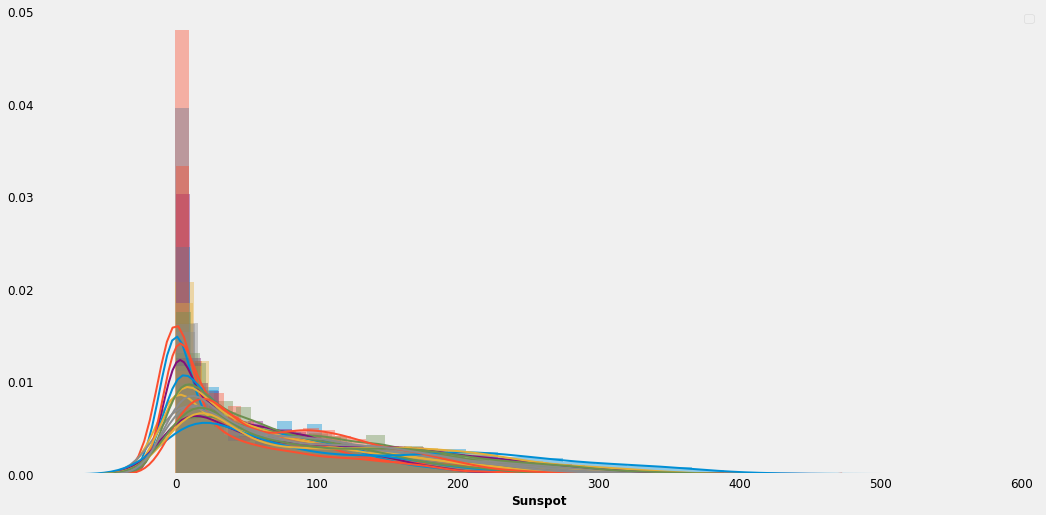

In [185]:
for y in range(len(C_YEAR)-1):
    cicle=c_data[(c_data['Year']>=C_YEAR[y]) & (c_data['Year']<=C_YEAR[y+1])]
    x=np.histogram(cicle.Sunspot,bins=100)[1][0:100]
    y=np.histogram(cicle.Sunspot,bins=100)[0]
    sns.distplot(cicle.Sunspot)
    plt.legend()

In [210]:
N_FEAT=np.arange(0,13,1)
RMSE=[]
N=[]
Y_MAX=[]
PRED_N=[]
Y_N=[]
YEAR=[]
COEF_N=[]
X_TOT=[]
for n in N_FEAT:
    PRED=[]
    COEF=[]
    Y=[]
    X_=[]
    for j in range(len(C_YEAR)-2):
        cicle=c_data[(c_data['Year']>=C_YEAR[j]) & (c_data['Year']<=C_YEAR[j+1])]
        x=np.histogram(cicle.Sunspot,bins=100)[1][0:100].astype(float)
        y=np.histogram(cicle.Sunspot,bins=100)[0].astype(float)
        #y=y+1
        #x=x+1
        #y=np.array(y)
        x=np.log(x+2)
        #print(y)
        x=x.reshape(-1,1)
        y=np.log(y+2)
        X_.append(np.exp(x-2))
        y=y.reshape(-1,1)
        y_min=y.min()
        #y=y-y.min()
        poly = PolynomialFeatures(n)
        X=poly.fit_transform(x)
        reg = LinearRegression().fit(X,y )
        pred=reg.predict(X)
        #print(len(pred),len(X))
        PRED.append(np.exp(pred-2))
        
        coef=[reg.intercept_[0]]
        for c in range(1,len(reg.coef_[0])):
            coef.append(reg.coef_[0][c])
        COEF.append(coef)
        RMSE.append(np.sqrt(mse(np.exp(pred-2),np.exp(y-2))))
        Y_MAX.append(np.max(np.exp(y-2)))
        Y.append(np.exp(y-2))
        N.append(n)
        YEAR.append(C_YEAR[j])
    X_TOT.append(X_)
    PRED_N.append(PRED)
    COEF_N.append(COEF)
    Y_N.append(Y)


In [211]:
res=pd.DataFrame({'RMSE':RMSE,'YEAR':YEAR,'PolynomialFeature':N,'Max':Y_MAX,'Percentage':np.array(RMSE)/np.array(Y_MAX)})


In [212]:
res.loc[res.RMSE==res.RMSE.min()]

,RMSE,YEAR,PolynomialFeature,Max,Percentage
191,1.014535,1986,11,57.246825,0.017722


In [213]:
res.sort_values(by='RMSE').head()

,RMSE,YEAR,PolynomialFeature,Max,Percentage
191,1.014535,1986,11,57.246825,0.017722
207,1.018206,1986,12,57.246825,0.017786
159,1.039374,1986,9,57.246825,0.018156
175,1.049546,1986,10,57.246825,0.018334
143,1.075865,1986,8,57.246825,0.018793


In [214]:
res.sort_values(by='RMSE').tail()

,RMSE,YEAR,PolynomialFeature,Max,Percentage
33,26.843774,1833,2,271.211908,0.098977
1,27.330568,1833,0,271.211908,0.100772
24,36.288902,1913,1,117.606361,0.308562
20,42.719595,1867,1,141.560706,0.301776
22,60.646108,1889,1,145.891435,0.415693


In [215]:
MEAN_RMSE=[]
for n in N_FEAT:
    MEAN_RMSE.append(res[res['PolynomialFeature']==n].RMSE.mean())

In [216]:
MEAN_RMSE=np.array(MEAN_RMSE)
min_mod=MEAN_RMSE.argmin()+6
min_rmse=MEAN_RMSE.min()

In [217]:
print (' The best model on training set is ' + str(min_mod)+' with mean RMSE = '+str(min_rmse))

 The best model on training set is 18 with mean RMSE = 2.189022348342116


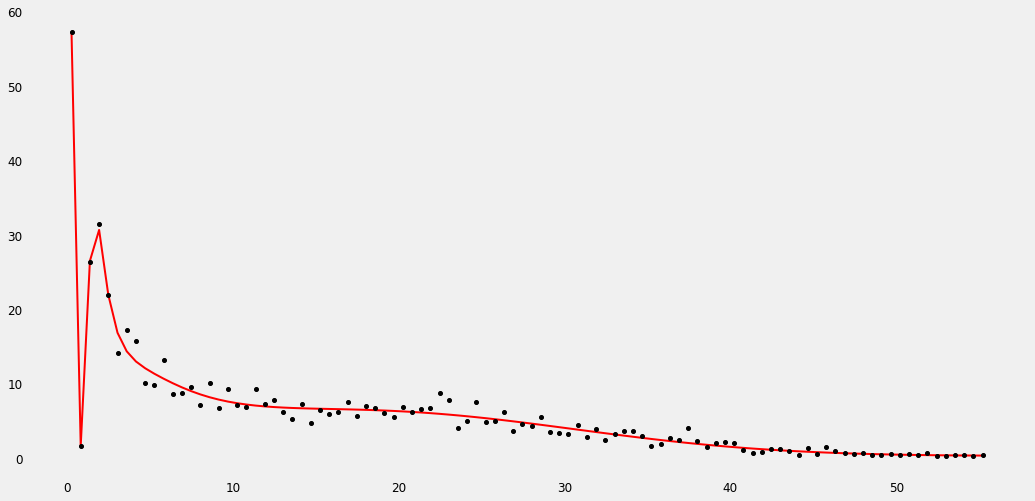

In [218]:
plt.plot(X_[len(PRED)-1],PRED[len(PRED)-1],color='red')
plt.plot(X_[len(PRED)-1],Y[len(PRED)-1],'.k')

In [219]:
MODELS=[]
for c in range(len(COEF_N)):
    model=np.zeros(len(COEF_N[c][0]))
    for y in range(len(COEF_N[c])):
        model=model+COEF_N[c][y]
    MODELS.append(model/16)

In [238]:
def make_prediction(degree):
    x=np.histogram(cicle.Sunspot,bins=50)[1][0:50].astype(float)
    x=np.log(x+4)
    #y=np.histogram(cicle.Sunspot,bins=50)[0].astype(float)
    pred=MODELS[degree][0]
    for i in range(1,degree+1):
        pred=pred+x**i*MODELS[degree][i]
    return pred-2

In [239]:
PRED=[]
RMSE=[]

cicle=c_data[(c_data['Year']>=C_YEAR[j+1]) & (c_data['Year']<=C_YEAR[j+2])]
x=np.histogram(cicle.Sunspot,bins=50)[1][0:50].astype(float)
y=np.histogram(cicle.Sunspot,bins=50)[0].astype(float)
y=y+2
y=np.log(y)

#x=x+1
#y=np.array(y)
x=np.log(x+2)
#print(y)
x=x.reshape(-1,1)
y=np.log(y)
Y=[]
#y=y.reshape(-1,1
for n in range(1,len(N_FEAT)):
    #y=y-y.min()
    poly = PolynomialFeatures(N_FEAT[n])
    pred=make_prediction(N_FEAT[n])
    RMSE.append(np.sqrt(mse(pred,y)))
   # plt.plot(pred)
   # plt.plot(y,color='black')
    PRED.append(pred)
    Y.append(y.max())
        

    

In [240]:
def get_model(degree):
    print('Intercept: '+ str(MODELS[degree][0]))
    for i in range(1,len(MODELS[degree])):
        print ('Coefficient %.i : '%(i) + str(MODELS[degree][i]))

In [241]:
RMSE=np.array(RMSE)
PERC=RMSE/y.max()

In [242]:
best_degree=1+RMSE.argmin()

In [243]:
RMSE

array([0.73417196, 0.7426175 , 0.6861814 , 0.70975847, 0.75161368,
       0.84867944, 0.70812613, 0.86064974, 0.79451843, 1.5766196 ,
       3.15550088, 1.66243885])

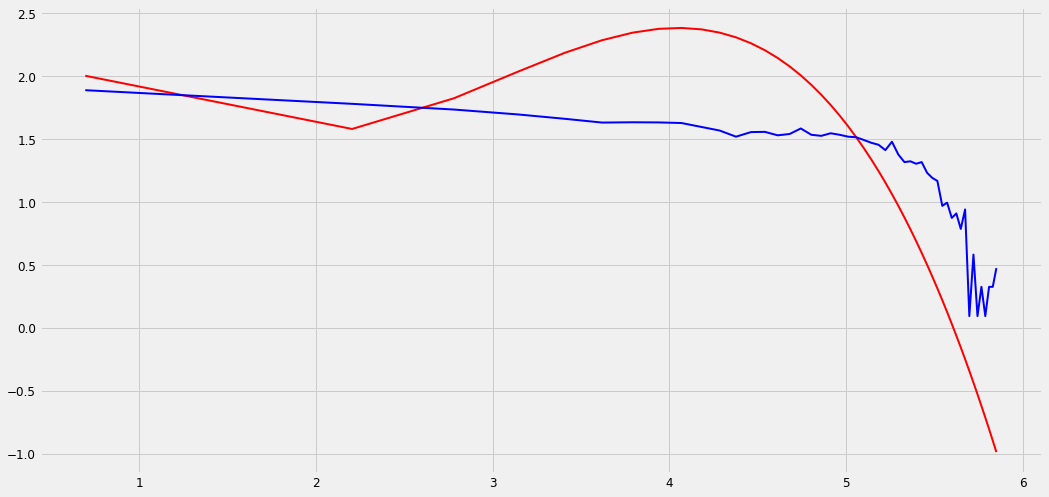

In [249]:
#plt.ylim(0,10)
plt.plot(x,(make_prediction(best_degree)),color='red')
plt.plot(x,(y),color='blue')
plt.grid(True)

In [250]:
get_model(best_degree)

Intercept: 8.79032203888516
Coefficient 1 : -5.963275571144201
Coefficient 2 : 2.1278425684272553
Coefficient 3 : -0.22815719196812645


$$y=8.79-5.96x+2.12x^{2}-0.2282x^{3}$$

In [254]:
from scipy import stats

In [255]:
T=[]
P=[]
for i in range(len(C_YEAR)-1):
    comp_1=c_data[(c_data['Year']>=C_YEAR[i]) & (c_data['Year']<=C_YEAR[i+1])]
    T_I=[]
    P_I=[]
    for j in range(len(C_YEAR)-1):
        comp_2=c_data[(c_data['Year']>=C_YEAR[j]) & (c_data['Year']<=C_YEAR[j+1])][0:len(comp_1)]
        T_I.append(stats.ttest_ind( np.array(comp_1.Sunspot),np.array(comp_2.Sunspot))[0])
        P_I.append(stats.ttest_ind( np.array(comp_1.Sunspot),np.array(comp_2.Sunspot))[1])
    T.append(T_I)
    P.append(P_I)

In [256]:
T_Data=pd.DataFrame()
for y in range(len(C_YEAR)-1):
    T_Data['%s'%(C_YEAR[y])]=T[y]
T_Data.index=C_YEAR[0:len(T_Data)]

In [257]:
P_Data=pd.DataFrame()
for y in range(len(C_YEAR)-1):
    P_Data['%s'%(C_YEAR[y])]=P[y]
P_Data.index=C_YEAR[0:len(T_Data)]

In [258]:
P_Data[P_Data>0.10].fillna('<0.10')

,1823,1833,1843,1856,1867,1878,1889,1901,1913,1923,1933,1944,1954,1964,1976,1986,1996
1823,1,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,0.976768,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10
1833,<0.10,1,<0.10,<0.10,<0.10,0.593764,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10
1843,<0.10,<0.10,1,0.498224,0.714949,<0.10,<0.10,<0.10,<0.10,<0.10,0.521118,<0.10,<0.10,0.124531,<0.10,<0.10,0.218512
1856,<0.10,<0.10,<0.10,1,0.794008,<0.10,<0.10,<0.10,<0.10,<0.10,0.174022,<0.10,<0.10,<0.10,<0.10,0.105643,<0.10
1867,<0.10,<0.10,<0.10,0.794008,1,<0.10,<0.10,<0.10,<0.10,<0.10,0.327529,<0.10,<0.10,<0.10,<0.10,0.177889,<0.10
1878,<0.10,<0.10,<0.10,<0.10,<0.10,1,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10
1889,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,1,<0.10,0.39526,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10
1901,<0.10,<0.10,<0.10,<0.10,<0.10,0.143607,<0.10,1,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10
1913,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,1,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10
1923,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,1,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10


In [259]:
T_Data[P_Data>0.10].fillna('Over')

,1823,1833,1843,1856,1867,1878,1889,1901,1913,1923,1933,1944,1954,1964,1976,1986,1996
1823,0,Over,Over,Over,Over,Over,Over,-0.0291217,Over,Over,Over,Over,Over,Over,Over,Over,Over
1833,Over,0,Over,Over,Over,0.53341,Over,Over,Over,Over,Over,Over,Over,Over,Over,Over,Over
1843,Over,Over,0,0.677315,0.36523,Over,Over,Over,Over,Over,-0.641649,Over,Over,-1.53616,Over,Over,-1.23058
1856,Over,Over,Over,0,-0.261117,Over,Over,Over,Over,Over,-1.3595,Over,Over,Over,Over,1.61827,Over
1867,Over,Over,Over,0.261117,0,Over,Over,Over,Over,Over,-0.979157,Over,Over,Over,Over,1.3474,Over
1878,Over,Over,Over,Over,Over,0,Over,Over,Over,Over,Over,Over,Over,Over,Over,Over,Over
1889,Over,Over,Over,Over,Over,Over,0,Over,-0.850163,Over,Over,Over,Over,Over,Over,Over,Over
1901,Over,Over,Over,Over,Over,1.46262,Over,0,Over,Over,Over,Over,Over,Over,Over,Over,Over
1913,Over,Over,Over,Over,Over,Over,Over,Over,0,Over,Over,Over,Over,Over,Over,Over,Over
1923,Over,Over,Over,Over,Over,Over,Over,Over,Over,0,Over,Over,Over,Over,Over,Over,Over


In [260]:
CORR=[]
for y in range(len(C_YEAR)-1):
    corr_perc=1.-sum(P_Data[P_Data>0.10][str(C_YEAR[y])].isna())/17
    CORR.append(corr_perc)

In [261]:
CORR=np.array(CORR)

In [262]:
chosen=[CORR[3],CORR[4],CORR[5],CORR[10]]

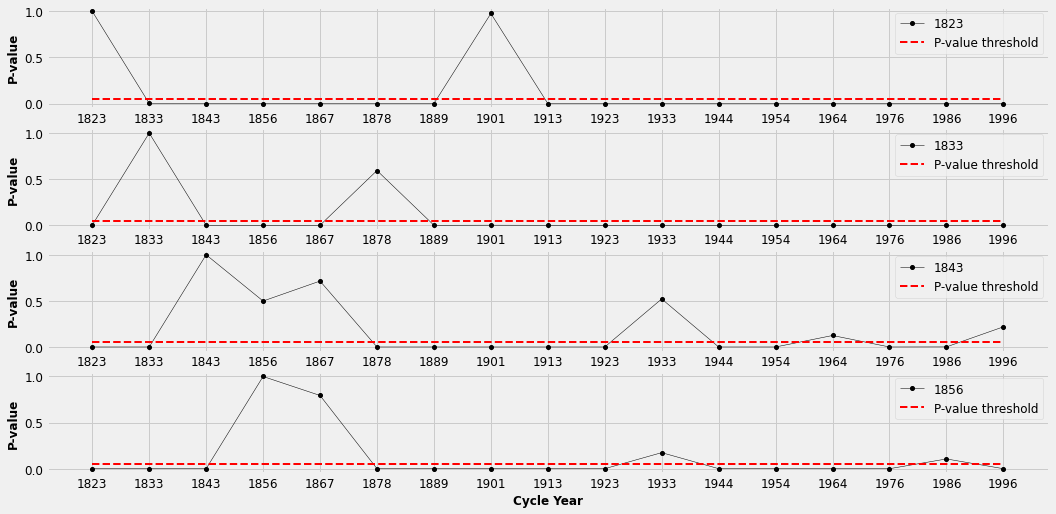

In [263]:
for i in range(4):
    plt.subplot(4,1,i+1)
    plt.plot(np.arange(0,len(P_Data),1),P_Data.loc[C_YEAR[i]],marker='.',lw=0.5,color='k',label=str(C_YEAR[i]))
    plt.plot(np.full(len(P_Data),fill_value=0.05),'--r',alpha=1.,label='P-value threshold')
    plt.grid(True)
    plt.xlabel('Cycle Year')
    plt.xticks(np.arange(0,len(P_Data),1),P_Data.columns)
    plt.legend()
    plt.ylabel('P-value')

In [264]:
best_corr_data=data[(data['Year']>=C_YEAR[CORR.argmax()]) & (data['Year']<=C_YEAR[CORR.argmax()+1])]

In [265]:
P_values=P_Data[P_Data>0.10]

In [266]:
NOT_NAN=np.array(P_values['1933'].notna())

In [267]:
P_values=np.array(P_values['1933'])

In [268]:
best_corr_y=C_YEAR[np.where(NOT_NAN==True)]

In [269]:
BEST_Y=[]
for i in range(len(best_corr_y)):
    J_in=best_corr_y[i]
    J_fin=C_YEAR.tolist()[C_YEAR.tolist().index(best_corr_y[i])+1]
    #print(J_in,J_fin)
    BEST_Y.append(np.array(data[(data['Year']>=J_in) & (data['Year']<=J_fin)].Sunspot))

([<matplotlib.axis.XTick at 0x7fa548ecb7f0>,
 [Text(0, 0, '0'),
  Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11'),
  Text(0, 0, '12'),
  Text(0, 0, '13'),
  Text(0, 0, '14'),
  Text(0, 0, '15'),
  Text(0, 0, '16'),
  Text(0, 0, '17'),
  Text(0, 0, '18'),
  Text(0, 0, '19'),
  Text(0, 0, '20'),
  Text(0, 0, '21')])

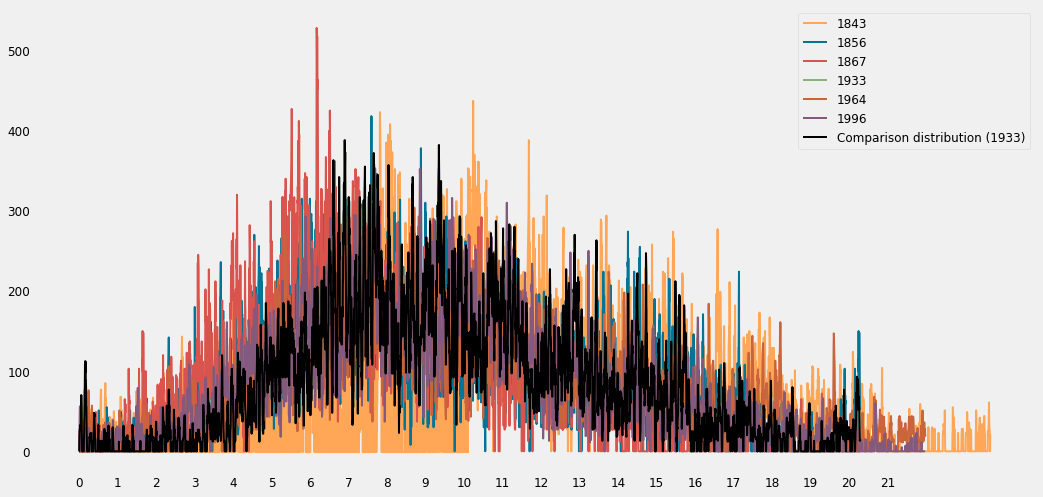

In [270]:
COLORS=[colors[0],colors[1],colors[2],colors[3],colors[4],colors[5],colors[6]]
for i in range(len(BEST_Y)):
    
    plt.plot(BEST_Y[i],color=COLORS[i],label='%s'%(str(best_corr_y[i])))
plt.plot(np.array(best_corr_data.Sunspot),color='k',label='Comparison distribution (1933)')
plt.legend()
plt.xticks(np.arange(0,4752,216),np.arange(0,22,1))

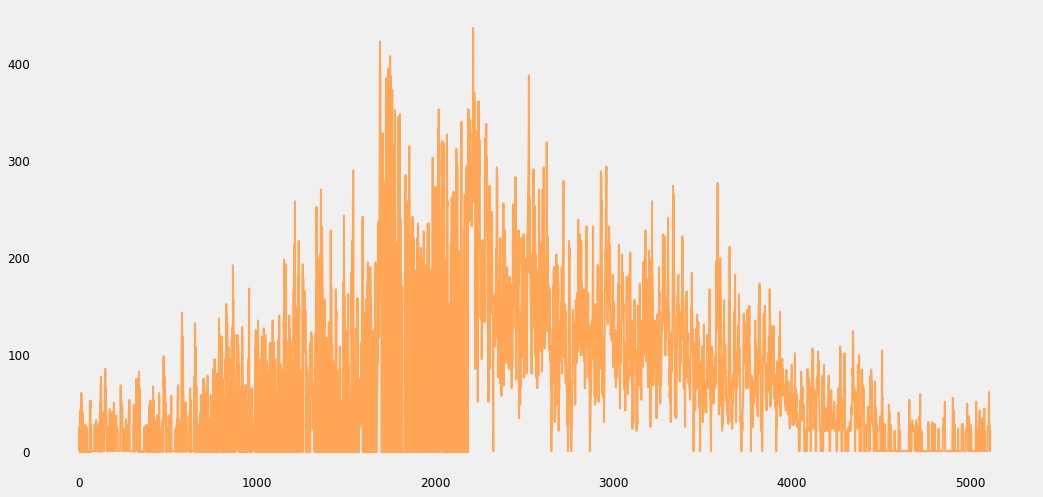

In [271]:
i=0
plt.plot(BEST_Y[i],color=COLORS[i],label='%s'%(str(best_corr_y[i])))


([<matplotlib.axis.XTick at 0x7fa5323583d0>,
 [Text(0, 0, '0'),
  Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11'),
  Text(0, 0, '12'),
  Text(0, 0, '13'),
  Text(0, 0, '14'),
  Text(0, 0, '15'),
  Text(0, 0, '16'),
  Text(0, 0, '17'),
  Text(0, 0, '18'),
  Text(0, 0, '19'),
  Text(0, 0, '20'),
  Text(0, 0, '21')])

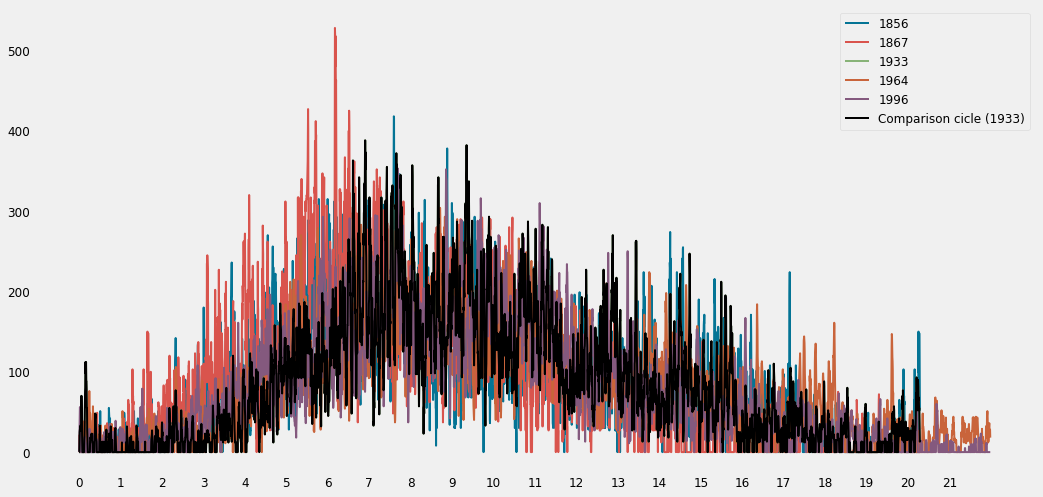

In [272]:
COLORS=[colors[0],colors[1],colors[2],colors[3],colors[4],colors[5],colors[6]]
for i in range(1,len(BEST_Y)):
    
    plt.plot(BEST_Y[i],color=COLORS[i],label='%s'%(str(best_corr_y[i])))
plt.plot(np.array(best_corr_data.Sunspot),color='k',label='Comparison cicle (1933)')
plt.legend()
plt.xticks(np.arange(0,4752,216),np.arange(0,22,1))

([<matplotlib.axis.XTick at 0x7fa53390a1f0>,
 [Text(0, 0, '0'),
  Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11'),
  Text(0, 0, '12'),
  Text(0, 0, '13'),
  Text(0, 0, '14'),
  Text(0, 0, '15'),
  Text(0, 0, '16'),
  Text(0, 0, '17'),
  Text(0, 0, '18'),
  Text(0, 0, '19'),
  Text(0, 0, '20'),
  Text(0, 0, '21')])

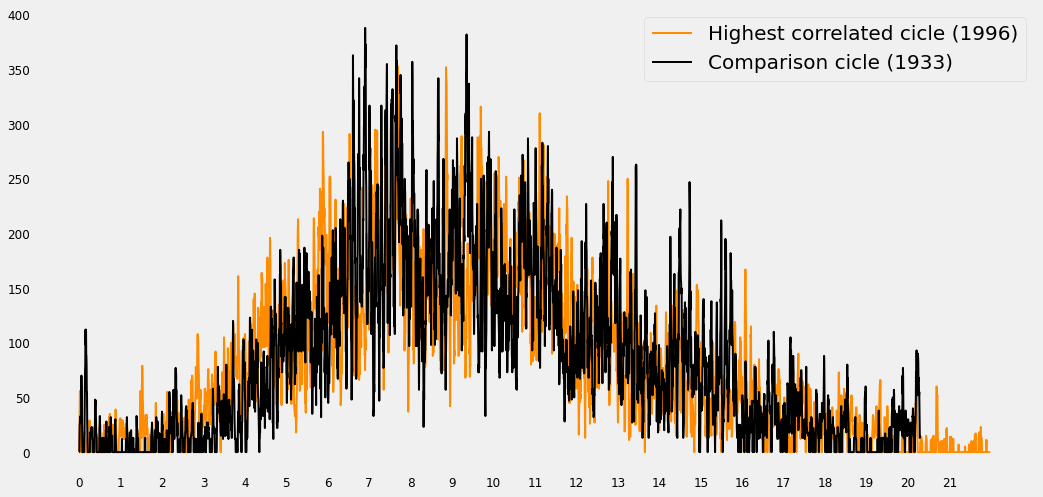

In [273]:
plt.plot(BEST_Y[i],color='darkorange',label='Highest correlated cicle (1996)')
plt.plot(np.array(best_corr_data.Sunspot),color='k',label='Comparison cicle (1933)')
plt.legend(fontsize=20)
plt.xticks(np.arange(0,4752,216),np.arange(0,22,1))

In [274]:
corr=np.array(best_corr_data.Sunspot)
model=BEST_Y[i][0:len(corr)]


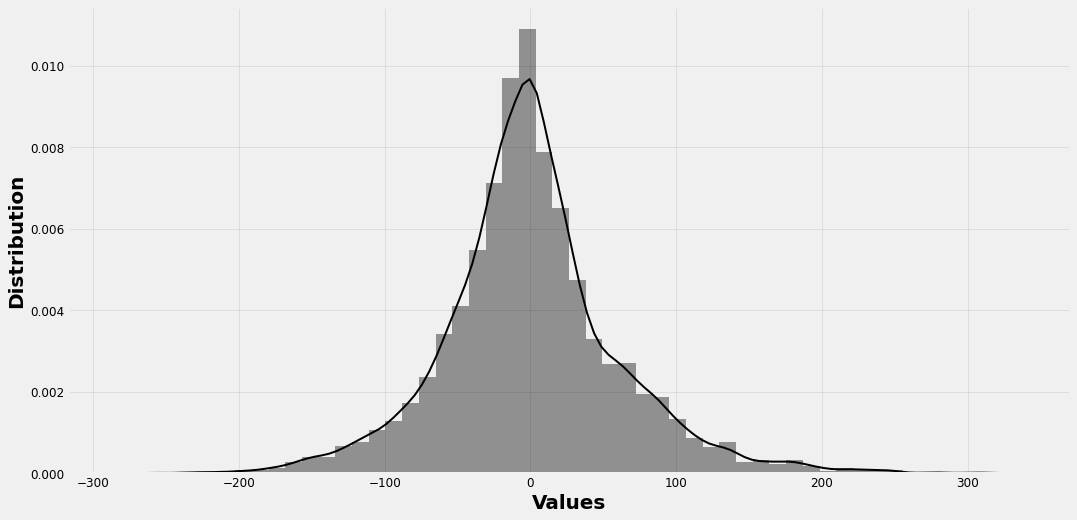

In [275]:
sns.distplot(np.array(corr-model),color='k')
plt.xlabel('Values', fontsize=20)
plt.ylabel('Distribution',fontsize=20)
plt.grid(True,alpha=0.5)

In [276]:
from scipy.stats import skew 

In [277]:
print(' The skewness of the distribution is %.2f' %(skew(np.array(corr-model))))

 The skewness of the distribution is 0.40


In [278]:
from scipy.stats import kurtosis 

In [279]:
print ('The kurtosis of the distribution is %.2f' %(kurtosis(np.array(corr-model))))

The kurtosis of the distribution is 1.94


In [280]:
gaus_x=np.histogram(np.array(corr-model),bins=40)[1]
gaus_y=np.histogram(np.array(corr-model),bins=41)[0]

In [281]:

def gaus(x,a,x0,sigma):
        return a*np.exp(-(x-x0)**2/(2*sigma**2))


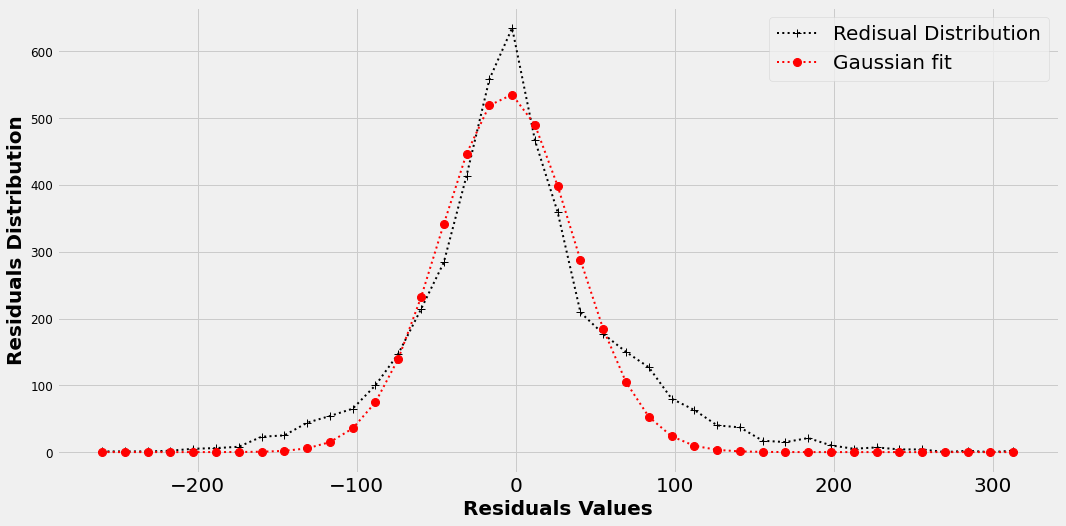

In [282]:
x=gaus_x
y=gaus_y

#x=sns.distplot(COEFF_D[0]).get_lines()[0].get_data()[0][a:b]
#y=sns.distplot(COEFF_D[0]).get_lines()[0].get_data()[1][a:b]
val_medio=x[int(len(x)/2)]
n = len(x)                       #the number of data
mean = sum(x*y)/n                   #note this correction
sigma = sum(y*(x-val_medio)**2)/n        #note this correction
p0 = [max(y),val_medio,200]
popt,pcov = curve_fit(gaus,x,y,p0=p0)
fig, (ax1) = plt.subplots(1, 1)
ax1.set_ylabel('Intensity [ADU]')
ax1.plot(x,y,'k+:',label='Redisual Distribution')
plt.ylabel('Residuals Distribution', fontsize=20)
plt.xlabel('Residuals Values', fontsize=20)
plt.xticks(fontsize=20)
ax1.plot(x,gaus(x,*popt),'ro:',label='Gaussian fit')
ax1.legend(fontsize=20)
plt.grid(True)
#res = y - gaus(x,*popt)
#ax2.plot(res)
#plt.show()


In [283]:
New_p = P_Data.replace(1.0,0.0)
start_y=New_p.max().sort_values()[-1:].index[0]

In [284]:
end_y=C_YEAR[New_p[start_y].argmax()]

In [285]:
print ('The best match within cycles (with the highest p-value) is between '+ str(end_y) + ' and ' +str(start_y))

The best match within cycles (with the highest p-value) is between 1823 and 1901


In [286]:
print ('The highest p-value is '+ str(New_p.max().sort_values()[-1:][0]))

The highest p-value is 0.9767681673911863


In [287]:
i_start=C_YEAR.tolist().index(int(start_y))

In [288]:
i_fin=C_YEAR.tolist().index(int(end_y))

In [289]:

J_in=C_YEAR[i_start]
J_fin=C_YEAR[i_start+1]
#print(J_in,J_fin)
value_fin=np.array(data[(data['Year']>=J_in) & (data['Year']<=J_fin)].Sunspot)
J_in=C_YEAR[i_fin]
J_fin=C_YEAR[i_fin+1]
#print(J_in,J_fin)
value_in=np.array(data[(data['Year']>=J_in) & (data['Year']<=J_fin)].Sunspot)

In [290]:
value_fin=value_fin[0:len(value_in)]

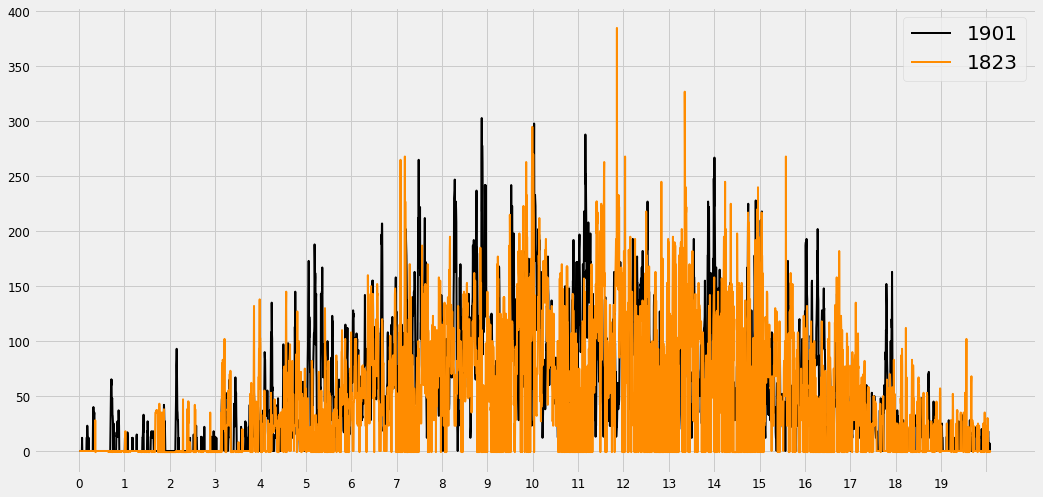

In [291]:
plt.plot(value_fin,color='k',label=str(C_YEAR[i_start]))
plt.plot(value_in,color='darkorange',label=str(C_YEAR[i_fin]))
plt.legend(fontsize=20)
plt.xticks(np.arange(0,4200,200),np.arange(0,20,1))
plt.grid(True)

Text(0, 0.5, 'Residual Distribution')

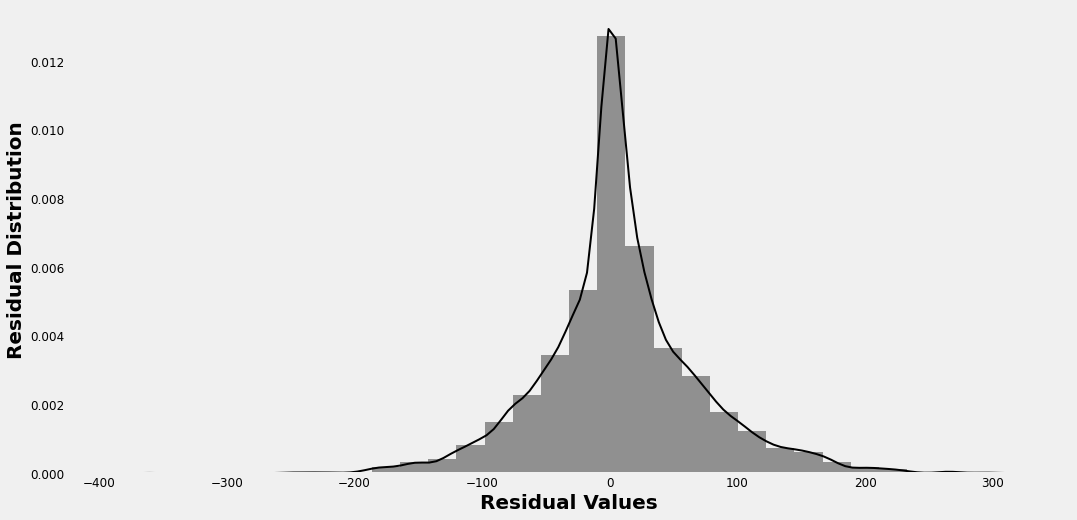

In [292]:
sns.distplot(np.array(value_fin-value_in),30,color='k')
plt.xlabel('Residual Values',fontsize=20)
plt.ylabel('Residual Distribution',fontsize=20)

In [293]:
print(' The skewness of the distribution is %.2f' %(skew(np.array(value_fin-value_in))))

 The skewness of the distribution is 0.23


In [294]:
print ('The kurtosis of the distribution is %.2f' %(kurtosis(np.array(value_fin-value_in))))

The kurtosis of the distribution is 2.02


In [295]:
J_in=C_YEAR[i_start]
J_fin=C_YEAR[i_start+1]
#print(J_in,J_fin)
value_fin=np.array(data[(data['Year']>=J_in) & (data['Year']<=J_fin)].Sunspot)
J_in=C_YEAR[i_fin]
J_fin=C_YEAR[i_fin+1]
#print(J_in,J_fin)
value_in=np.array(data[(data['Year']>=J_in) & (data['Year']<=J_fin)].Sunspot)

In [296]:
value_in=np.append(value_in,np.zeros(len(value_fin)-len(value_in)))

Text(0, 0.5, 'Residual Distribution')

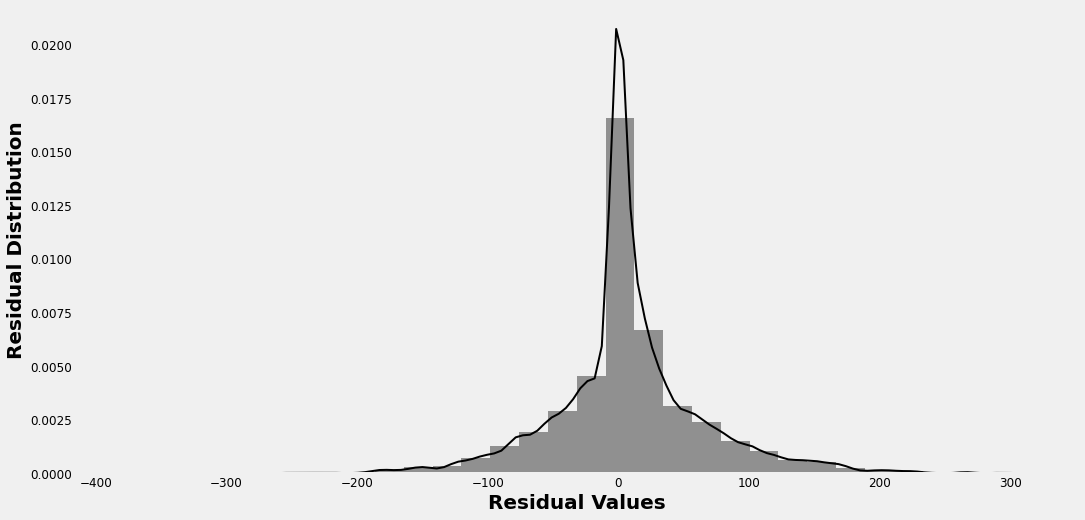

In [297]:
sns.distplot(np.array(value_fin-value_in),30,color='k')
plt.xlabel('Residual Values',fontsize=20)
plt.ylabel('Residual Distribution',fontsize=20)

In [298]:
print(' The skewness of the distribution is %.2f' %(skew(np.array(value_fin-value_in))))

 The skewness of the distribution is 0.28


In [299]:
print ('The kurtosis of the distribution is %.2f' %(kurtosis(np.array(value_fin-value_in))))

The kurtosis of the distribution is 2.89


In [300]:
J_in=C_YEAR[i_start]
J_fin=C_YEAR[i_start+1]
#print(J_in,J_fin)
value_fin=np.array(data[(data['Year']>=J_in) & (data['Year']<=J_fin)].Sunspot)
J_in=C_YEAR[i_fin]
J_fin=C_YEAR[i_fin+1]
#print(J_in,J_fin)
value_in=np.array(data[(data['Year']>=J_in) & (data['Year']<=J_fin)].Sunspot)

In [301]:
value_fin=value_fin[0:len(value_in)]

In [302]:
diff=np.array(value_in-value_fin)

In [303]:
x=np.histogram(diff,100)[1]
y=np.histogram(diff,101)[0]

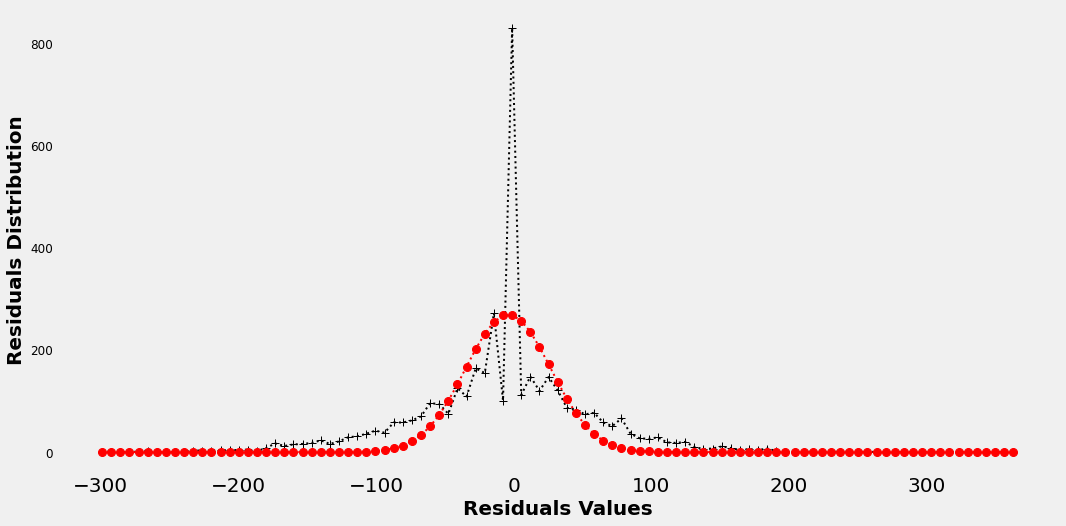

In [304]:


#x=sns.distplot(COEFF_D[0]).get_lines()[0].get_data()[0][a:b]
#y=sns.distplot(COEFF_D[0]).get_lines()[0].get_data()[1][a:b]
val_medio=x[int(len(x)/2)]
n = len(x)                       #the number of data
mean = sum(x*y)/n                   #note this correction
sigma = sum(y*(x-val_medio)**2)/n        #note this correction
p0 = [max(y),val_medio,200]
popt,pcov = curve_fit(gaus,x,y,p0=p0)
fig, (ax1) = plt.subplots(1, 1)
ax1.set_ylabel('Intensity [ADU]')
ax1.plot(x,y,'k+:',label='Redisual Distribution')
plt.ylabel('Residuals Distribution', fontsize=20)
plt.xlabel('Residuals Values', fontsize=20)
plt.xticks(fontsize=20)
ax1.plot(x,gaus(x,*popt),'ro:',label='Gaussian fit')

In [305]:
DIST=stats.weibull_min.pdf(np.arange(0,35),*stats.weibull_min.fit(np.array(datapoint.M)))

In [306]:
y=np.histogram(cicle.Sunspot,bins=50)[0].astype(float)
y=y+1
y=np.log(y)

In [569]:
Y=[]
X=[]
L=[]
for j in range(len(C_YEAR)-1):
    cicle=c_data[(c_data['Year']>=C_YEAR[j]) & (c_data['Year']<=C_YEAR[j+1])]
    L.append(len(cicle))
    n=cicle.Sunspot.max()
    y_h=np.histogram(cicle.Sunspot,bins=n)[0].astype(float)
    x_h=np.histogram(cicle.Sunspot,bins=n)[1].astype(float)[0:len(y_h)]
    for v in range(len(y_h)):
        Y.append(y_h[v])
        X.append(x_h[v])

In [570]:
Y=np.array(Y)
X=np.array(X)

In [589]:
import random
POP=[]
for i in range(2000):
    POP.append(np.array(random.choices(population=X, weights=Y, k=np.array(L).mean().astype(int))))

In [845]:
import random
POP=[]
for i in range(200):
    POP.append(np.array(random.choices(population=X, weights=Y, k=4000)))

In [846]:
MAXES=[]
for i in range(len(POP)):
    MAXES.append(POP[i].max())

In [847]:
MAXES=np.array(MAXES).round()

In [850]:
def H(x,psi,mu,sigma):
        return np.exp(-(mu+sigma/abs(psi)-x)/sigma**(1/abs(psi)))

In [851]:
x=np.histogram(MAXES,2000)[1][0:2000]
y=np.histogram(MAXES,2000)[0]

In [858]:
y_V=np.random.weibull(470,20000)
x_V=np.arange(0,len(y_V),1)

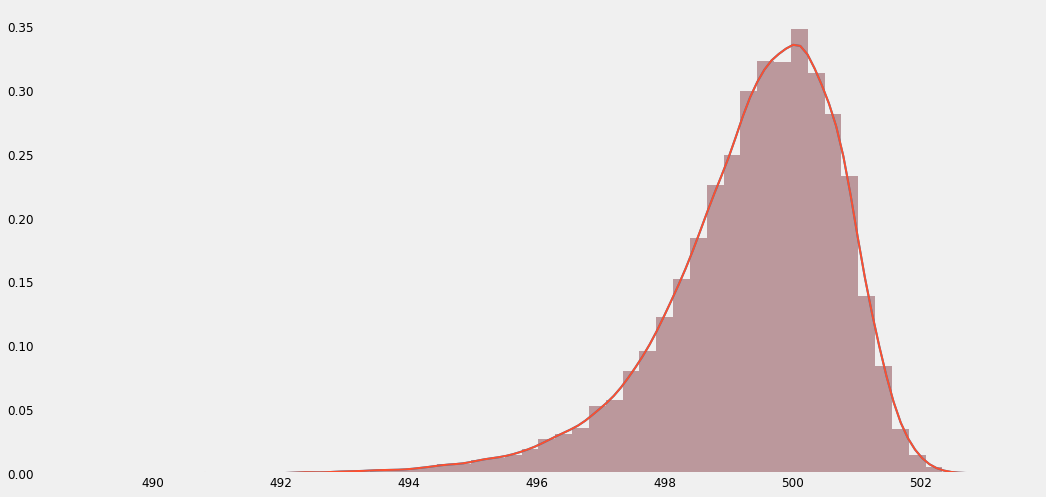

In [877]:
x_v=sns.distplot(y_V*500).get_lines()[0].get_data()[0]
y_v=sns.distplot(y_V*500).get_lines()[0].get_data()[1]*17.5/0.35

In [ ]:
plt.plot8

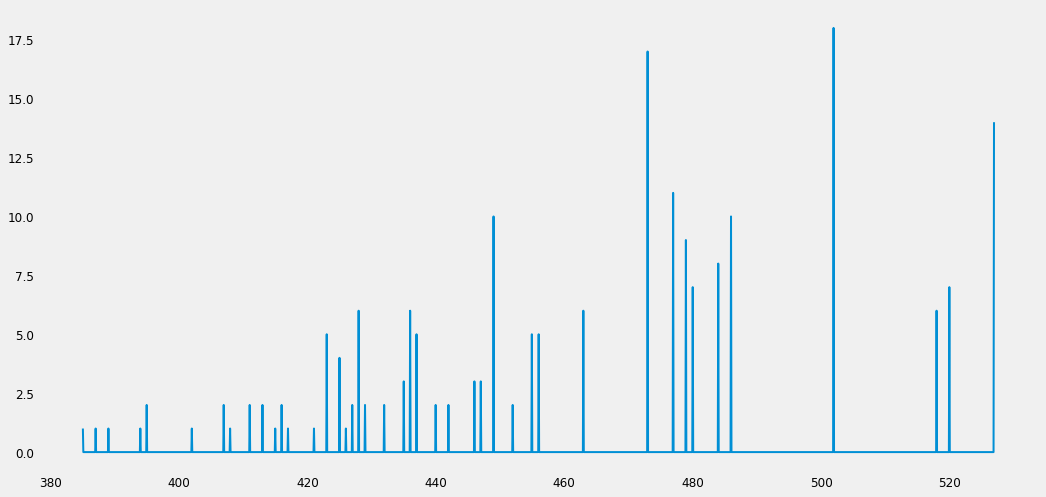

In [881]:
plt.plot(x,y)
#plt.plot(x_v,y_v)#plt.plot(np.histogram(y_V)[1])

In [707]:
new_MAXES=MAXES.copy()
new_MAXES.sort()

In [880]:
p0=[-2.,10,20]
popt,pcov = curve_fit(H,x,y,p0=p0)
#fig, (ax1) = plt.subplots(1, 1)
#ax1.set_ylabel('Intensity [ADU]')
#ax1.plot(x,y,'k+:',label='Redisual Distribution')
#plt.ylabel('Residuals Distribution', fontsize=20)
#plt.xlabel('Residuals Values', fontsize=20)
#plt.xticks(fontsize=20)
#ax1.plot(x,H(x,*popt),'ro:',label='Gaussian fit')

<ipython-input-850-722604bd91c9>:2: RuntimeWarning: invalid value encountered in double_scalars
  return np.exp(-(mu+sigma/abs(psi)-x)/sigma**(1/abs(psi)))
